In [1]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

###Homework 1 Revised

1) Plot $\cos(x)$ from $-\pi$ to $\pi$ along with the Taylor approximation using (1,2,3,4) terms. I want 5 lines on the same graph.

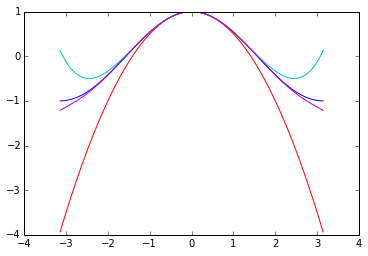

In [2]:
xs = np.linspace(-math.pi,math.pi,100)
ys = [math.cos(x) for x in xs]

os = [1 for x in xs]
tws = [1-x**2/math.factorial(2) for x in xs]
ths = [1 - x**2/math.factorial(2) + x**4/math.factorial(4) for x in xs]
fs = [1 - x**2/math.factorial(2) + x**4/math.factorial(4) - x**6/math.factorial(6) for x in xs]

plt.plot(xs,ys)
plt.plot(xs,os)
plt.plot(xs,tws)
plt.plot(xs,ths)
plt.plot(xs,fs)

2) If we estimate $\cos(0.1)$ using 4 **non-zero** terms, what is the bound on the **truncation error**.

In [3]:
def calError(x,f,e):
    c_e = f*np.abs((x**(e+1))/math.factorial(e+1))
    return c_e
print calError(0.1,1,6)


1.98412698413e-11


3) How many **non-zero** terms do we need to calculate $\cos(0.1)$ such that the bound on the **truncation error** is less than $10^{-7}$

In [4]:
def passError(x,f,e,limit):
    while(True):
        c_e = calError(x,f,e)
        if c_e <= limit:
            return e+1,c_e
        e+=2
t,e = passError(0.1,1,0,0.0000001)
print "Term: {}(x^{}), error: {}".format((t-1)/2+1,t-1,e)

Term: 3(x^4), error: 8.33333333333e-08


4) Plot $\ln (1+x)$ from $-0.5$ to $0.5$ along with the Taylor approximation using (1,2,3,4) terms. I want 5 lines on the same plot.

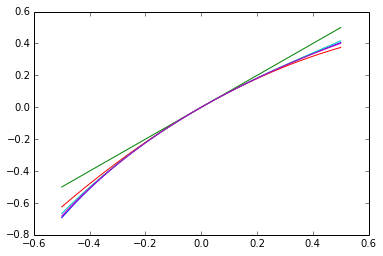

In [5]:
xs = np.linspace(-0.5,0.5,100)
ys = [math.log(x+1) for x in xs]
os = [x for x in xs]
tws= [x - x**2/math.factorial(2) for x in xs]
ths= [x - x**2/math.factorial(2) + 2*x**3/math.factorial(3) for x in xs]
fs = [x - x**2/math.factorial(2) + 2*x**3/math.factorial(3) - 6*x**4/math.factorial(4) for x in xs]


plt.plot(xs,ys)
plt.plot(xs,os)
plt.plot(xs,tws)
plt.plot(xs,ths)
plt.plot(xs,fs)

5)If we calculate $\ln(1.5)$ using 3 **non-zero** terms, what is the bound on the **truncation error**.

In [38]:
# f<=6 as 6/(1+x)^4 has most value when x = 0
def calError(x,f,e):
    c_e = f*np.abs((x**(e+1))/math.factorial(e+1))
    return c_e
e= calError(0.5,6.,3)
print e
# x = 0.5
# s = x - x**2/math.factorial(2) + 2.*x**3/math.factorial(3)
# print math.log(1.5)
# print s
# print s+e,s-e


0.015625


6)How many **non-zero** terms do we need to calculate $\ln(1.5)$ such that the bound on **truncation error** is less than $10^{-7}$. Be sure to justify the maximum of $f^{(n+1)}(\xi)$ term.


In [7]:
def newPassError(x,f,e,limit):
    while(True):
        c_e = calError(x,math.factorial(f),e)
        if c_e <= limit:
            return e+1,c_e
        e+=1
        f+=1
t,e = newPassError(0.5,1.0,1,0.0000001)
print "Non-zero term: {}(x^{}), error: {}".format(t-1,t-1,e)

# print calError(0.5)


Non-zero term: 19(x^19), error: 4.76837158203e-08


7) Notice that $\tan(1) = \pi/4$ , this means we can calculate $\pi$ by using $4 \times \arctan(1)$

So this means that if we find Taylor series expansion of $\arctan(x)$ around $x=0$, then we can calculate $\pi$ to any accuracy we want.

7.1) Find taylor expansion of $\arctan$ for 3 **non-zero** terms. If you forgot,
$$
\frac{d}{dx} \arctan(x) = \frac{1}{1+x^2}
$$

$$
a_0 = \arctan(0) = 0
$$

$$
a_1 = f'(x) = \frac{1}{1+x^2} = f'(0) = 1
$$

$$
a_2 = f"(x) = -\frac{2x}{(1+x^2)^2} = f"(0) = 0
$$

$$
a_3 = f^{(3)}(x) = \frac{6x^2-2}{(1+x^2)^3} = f^{(3)}(0) = -2
$$

$$
a_4 = f^{(4)}(x) = \frac{24x(x^2-1)}{(x^2+1)^4} = f^{(4)}(0)  = 0
$$

$$
a_5 = f^{(5)}(x) = -\frac{24(5x^4-1)}{(x^2+1)^5} = f^{(5)}(0) = 24
$$

7.2) Guess the rest of the terms

$$
x-\frac{2}{3!}x^3+\frac{24}{5!}x^5+\dots
= x-\frac{x^3}{3}+\frac{x^5}{5}-\frac{x^7}{7}+...+(-1)^{\frac{n-1}{2}}\frac{x^n}{n} \forall n \in \{1,3,5,7,...\}
$$

7.3) Calculate $\pi$ using taylor approximation for 100 **non-zero** terms. (Note I changed this to 100 terms so you must write some sort of for loop to do it).

In [37]:
ans = 0
x=1
for i in range(1,201,2):
    ans += (-1.)**((i-1)/2.)*(x**i)/i
err = 0
err = np.abs(1./200)
print ans
print err
    
print "Pi upperbound,ans,lowerbound: {},{},{}".format(4*(ans+err),4*ans,4*(ans-err))



0.78289822589
0.005
Pi upperbound,ans,lowerbound: 3.15159290356,3.13159290356,3.11159290356


8) The purpose of this problem is to make sure you know that the bound on $f^{(n+1)}(\xi)$ after all the cancellation is **NOT** necessarily 1 **NOR** does it have to look the same as the next term in the series.

8.1)Find the first 3 **non-zero** terms of Taylor series for
$$f(x) = \frac{1}{1-x}$$

$$
f(x) = 1 + \frac{x}{(1-x)^2} - \frac{2x^2}{(x-1)^3*2!} + \frac{6x^3}{(x-1)^4*3!}
$$

$$
f(x) = 1 + \frac{x}{(1-x)^2} - \frac{x^2}{(x-1)^3*} + \frac{x^3}{(x-1)^4}
$$

8.2) If we estimate $$\frac{1}{0.8} = \frac{1}{1-0.2}$$ using the first 3 non-zero terms, what is the bound on the truncation error. Be careful about evaluating the bound for $f^{(n+1)}({\xi})$.

error term $$
= \frac{6x^3}{(x-1)^4}
$$

In [36]:

f = (1/((0.2-1)**4))
error = f * (0.2**3/6.)
print error

0.00325520833333
